# TensorFlow

### Boston dataset

In [36]:
import tensorflow as tf

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

import pandas as pd
import numpy as np

boston = load_boston()

X = pd.DataFrame(boston.data)
y = boston.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state = 32)

scaler = MinMaxScaler(feature_range=(0,1))

x_train = scaler.fit_transform(x_train)
x_test =  scaler.transform(x_test)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_dim=13, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])


history = model.fit(x_train, y_train, epochs=500, verbose=0, validation_split = 0.1)



df = pd.DataFrame(history.history)
df['epoch'] = history.epoch

df

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
0,623.237305,623.237305,23.276068,608.087097,608.087097,22.830746,0
1,615.202026,615.202026,23.102831,600.327637,600.327637,22.659775,1
2,607.116699,607.116699,22.929295,592.555054,592.555054,22.485912,2
3,599.119080,599.119080,22.751333,584.546997,584.546997,22.302778,3
4,590.642090,590.642090,22.567390,576.192078,576.192078,22.108034,4
...,...,...,...,...,...,...,...
495,21.317287,21.317287,3.184507,19.874008,19.874008,3.498882,495
496,21.341599,21.341599,3.212393,19.890121,19.890121,3.498357,496
497,21.293051,21.293051,3.187842,19.723093,19.723093,3.496156,497
498,21.309977,21.309977,3.162991,19.719282,19.719282,3.495945,498


In [37]:
rmse_first = np.sqrt(float(df['val_mse'].head(1)))
rmse_final = np.sqrt(float(df['val_mse'].tail(1)))

print('First Root Mean Square Error on Training set: {}'.format(round(rmse_first, 3)))
print('Final Root Mean Square Error on Training set: {}'.format(round(rmse_final, 3)))

First Root Mean Square Error on Training set: 24.659
Final Root Mean Square Error on Training set: 4.456


(0.0, 50.0)

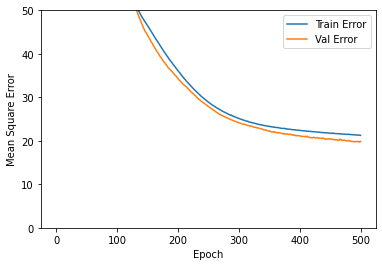

In [38]:
from matplotlib import pyplot as plt

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(df['epoch'], df['mse'], label='Train Error')
plt.plot(df['epoch'], df['val_mse'], label = 'Val Error')
plt.legend()
plt.ylim([0,50])

### Using Test Data

In [30]:
loss,mse,mae =  model.evaluate(x_test, y_test, verbose=0)

rmse = np.sqrt(mse)

print('Root Mean Square Error on Test set: {}'.format(round(rmse, 3)))


Root Mean Square Error on Test set: 5.232


In [31]:
y_pred = model.predict(x_test)

from sklearn.metrics import r2_score

print('R2 Score on Training set: {}'.format(round(r2_score(y_test, y_pred), 3)))

R2 Score on Training set: 0.691


### MNIST Digits

In [116]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

predictions = model(x_train[:1]).numpy()

print(predictions)
print(y_train[:1])

[[ 0.19664851  0.59010434 -0.27751008  0.41849208  0.07198575 -0.04175621
  -0.00842755 -0.8650266   0.18778972 -0.097311  ]]
[5]


In [117]:
tf.nn.softmax(predictions).numpy()

array([[0.11210128, 0.16614461, 0.06977279, 0.13994455, 0.0989624 ,
        0.08832277, 0.09131605, 0.03877314, 0.11111258, 0.08354983]],
      dtype=float32)

In [124]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(y_train[:1], predictions).numpy()

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, verbose=0)

df = pd.DataFrame(history.history)

df

,loss,accuracy
0,0.011511,0.996650
1,0.010565,0.996483
2,0.011667,0.996350
3,0.011654,0.996383
4,0.012087,0.996133


In [126]:
model.evaluate(x_test,  y_test, verbose=0)

[0.15990760922431946, 0.9805999994277954]

### Deep and Wide

In [32]:
boston = load_boston()

X = pd.DataFrame(boston.data)
y = boston.target

X.columns = boston.feature_names

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state = 32)

scaler = MinMaxScaler(feature_range=(0,1))

x_train_2c = x_train[{"RM", "LSTAT"}]
x_test_2c = x_test[{"RM", "LSTAT"}]

x_train = scaler.fit_transform(x_train)
x_test =  scaler.transform(x_test)

x_train_2c = scaler.fit_transform(x_train_2c)
x_test_2c = scaler.transform(x_test_2c)

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_dim=13, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_dim=2, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])

model = tf.keras.experimental.WideDeepModel(model1, model2, activation=None)

model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])


history = model.fit([x_train,x_train_2c], y_train, epochs=500, verbose=0, validation_split = 0.1)



df = pd.DataFrame(history.history)
df['epoch'] = history.epoch

df



,loss,mse,mae,val_loss,val_mse,val_mae,epoch
0,606.105957,606.105957,22.888611,582.531189,582.531189,22.255718,0
1,583.259644,583.259644,22.371864,559.702148,559.702148,21.717823,1
2,559.223633,559.223633,21.818195,535.573242,535.573242,21.129068,2
3,533.756653,533.756653,21.192526,508.531769,508.531769,20.444328,3
4,504.261078,504.261078,20.465904,478.426300,478.426300,19.647320,4
...,...,...,...,...,...,...,...
495,12.754156,12.754156,2.422289,14.627441,14.627441,3.133241,495
496,12.761134,12.761134,2.429406,14.624519,14.624519,3.131277,496
497,12.735104,12.735104,2.418666,14.600205,14.600205,3.133198,497
498,12.777089,12.777089,2.439941,14.608987,14.608987,3.140955,498
